## Libraries executar antes do load

In [34]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing the Training Set executar antes do load

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,       
    zoom_range=0.2,           
    horizontal_flip=True      
)

train_set = train_datagen.flow_from_directory(
    'dataset/training_set/',
    target_size=(64, 64),   
    batch_size=32,
    class_mode='binary'       
)

Found 8000 images belonging to 2 classes.


## Preprocessing the Test Set executar antes do load

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Carregar o conjunto de validação
test_set = test_datagen.flow_from_directory(
    'dataset/test_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Convolution Pooling Flattening

In [8]:
cnn = tf.keras.models.Sequential([
    
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    
    # pool_size janelas 2x2 que analisa, strides de quanto em quanto se passa na imagem
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # Segunda camada
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # Camada de achatamento (flatten) para transformar os dados 2D em um vetor 1D
    tf.keras.layers.Flatten(),
    
    # Camada totalmente conectada com 128 unidades e ativação ReLU
    tf.keras.layers.Dense(units=128, activation='relu'),
    
    # Camada de saída com 1 unidade e ativação sigmoide para classificação binária
    tf.keras.layers.Dense(units=1, activation='sigmoid')

])

## Traning the CNN

In [10]:
cnn.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = cnn.fit(x = train_set, validation_data = test_set, epochs = 25)

Epoch 1/25


C:\Users\Gabriel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.5280 - loss: 0.6972 - val_accuracy: 0.6625 - val_loss: 0.6137
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6688 - loss: 0.6122 - val_accuracy: 0.6855 - val_loss: 0.6006
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.6992 - loss: 0.5662 - val_accuracy: 0.7190 - val_loss: 0.5380
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - accuracy: 0.7349 - loss: 0.5218 - val_accuracy: 0.7145 - val_loss: 0.5836
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7613 - loss: 0.4908 - val_accuracy: 0.7450 - val_loss: 0.5219
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7644 - loss: 0.4869 - val_accuracy: 0.7435 - val_loss: 0.5219
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7830 - loss: 0.4667 - val_accuracy: 0.7305 - val_loss: 0.5647
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7835 - loss: 0.4595 - val_accur

In [12]:
cnn.save('modelo_gato_cachorro.keras')

## Resultados

In [14]:
## cnn = load_model('modelo_gato_cachorro.keras', compile=False)

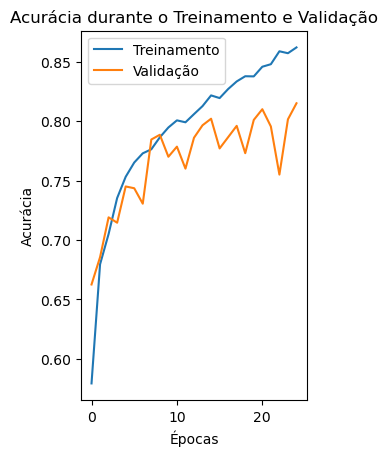

In [17]:
# Plotando Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

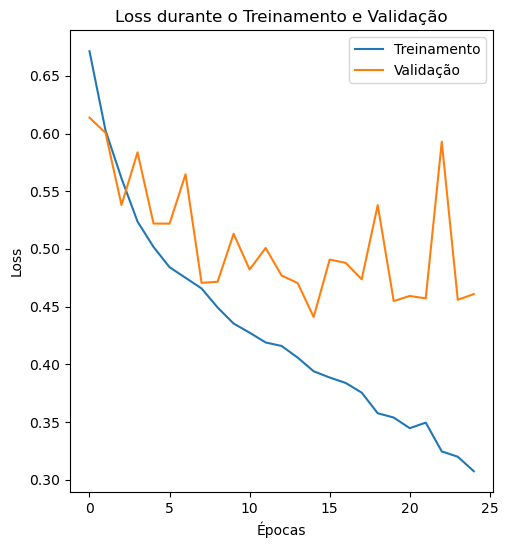

In [18]:
# Plotando Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()